In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.width', 1000)  # 设置字符显示宽度
pd.set_option('display.max_rows', None)  # 设置显示最大
df = pd.read_csv("profiles/model_interference_feature.csv")
df.sort_values(by=["modelname1","batchsize1"], inplace=True)
df[["modelname1","batchsize1","mean_l2_utilization1","model_gflops1","model_GFLOPS1","modelname2","batchsize2","mean_l2_utilization2","model_GFLOPS2","single_coefficient","multi_coefficient"]].head(80)



,modelname1,batchsize1,mean_l2_utilization1,model_gflops1,model_GFLOPS1,modelname2,batchsize2,mean_l2_utilization2,model_GFLOPS2,single_coefficient,multi_coefficient
6,LSTM-2,100,22.561066,1.333663,136.436147,resnet-50,2,30.714278,3093.140483,2.808211,10.843497
16,LSTM-2,100,22.561066,1.333663,136.436147,mobilenet,4,18.624206,987.075125,1.798503,10.109065
66,LSTM-2,100,22.561066,1.333663,136.436147,transformer,8,48.291161,300.624944,1.181349,11.729067
78,LSTM-2,100,22.561066,1.333663,136.436147,shufflenet,4,6.232634,236.915947,0.703756,11.283360
49,mobilenet,2,11.233517,0.609992,614.746857,resnet-34,16,26.270329,5381.664126,1.697162,3.445708
31,mobilenet,4,18.624206,1.219983,987.075125,squeezenet-1.1,1,7.356819,193.404046,0.304255,1.247898
22,mobilenet,8,23.348269,2.439966,1242.974778,resnet-18,1,19.840690,1891.813734,1.088028,1.924527
45,mobilenet,8,23.348269,2.439966,1242.974778,resnet-152,1,31.312006,2088.288062,1.177391,2.597178
17,mobilenet,16,26.886279,4.879932,1337.032751,LSTM-2,100,22.561066,136.436147,0.683241,0.517509
30,mobilenet,16,26.886279,4.879932,1337.032751,shufflenet,2,3.559367,124.374852,0.394201,0.814635


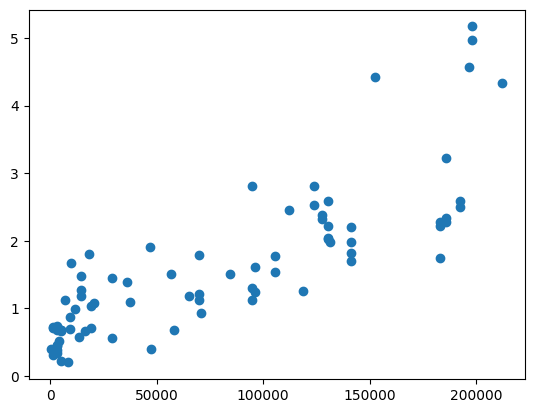

In [2]:

import matplotlib.pyplot as plt
x1=df["mean_l2_utilization1"]*df["model_GFLOPS1"]
x2=df["mean_l2_utilization2"]*df["model_GFLOPS2"]
#x=x2*df["mean_l2_utilization2"]/df["mean_l2_utilization1"]
x=x2
#x=df["model_GFLOPS2"]
y=df["single_coefficient"]
plt.scatter(x, y)
plt.show()


Coefficient for x1: 1.9868256728699923e-06
Coefficient for x2: 1.289700576929052e-05


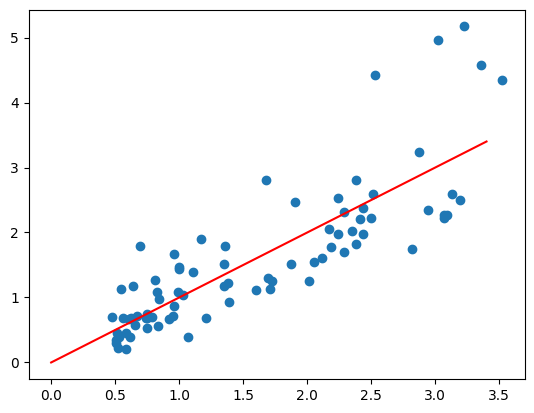

In [3]:
from sklearn.linear_model import LinearRegression
# Create an instance of LinearRegression
regression_model = LinearRegression()

# Reshape the x1 and x2 arrays to 2D
x1 = x1.values.reshape(-1, 1)
x2 = x2.values.reshape(-1, 1)

# Fit the model using x1, x2, and y
regression_model.fit(np.concatenate((x1, x2), axis=1), y)

# Get the coefficients and intercept
coefficients = regression_model.coef_
intercept = regression_model.intercept_

# Print the coefficients and intercept
print("Coefficient for x1:", coefficients[0])
print("Coefficient for x2:", coefficients[1])
x=coefficients[0]*x1+coefficients[1]*x2+intercept
plt.scatter(x, y)

regression_model2=LinearRegression()
regression_model2.fit(x, y)
coefficients2 = regression_model2.coef_
intercept2 = regression_model2.intercept_
x2=[i*0.1 for i in range(0,35)]
y2=coefficients2*np.array(x2)+intercept2
plt.plot(x2,y2, color='red')
plt.show()


In [4]:
df2=pd.read_csv("profiles/model_interference_feature2.csv")
data=df2[["batchsize1","mean_l2_hit_rate1","mean_l2_utilization1","mean_sm_efficiency1","model_GFLOPS1","model_mps1",\
    "batchsize2","mean_l2_hit_rate2","mean_l2_utilization2","mean_sm_efficiency2","model_GFLOPS2","model_mps2","model_num","interference"]]

data.head(20)

,batchsize1,mean_l2_hit_rate1,mean_l2_utilization1,mean_sm_efficiency1,model_GFLOPS1,model_mps1,batchsize2,mean_l2_hit_rate2,mean_l2_utilization2,mean_sm_efficiency2,model_GFLOPS2,model_mps2,model_num,interference
0,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,10,1,102.040816
1,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,20,1,101.784713
2,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,30,1,102.203659
3,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,40,1,103.688718
4,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,50,1,105.996568
5,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,60,1,108.118173
6,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,70,1,111.131358
7,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,80,1,114.965358
8,16,84.71695,66.896454,59.603225,307.024714,10,16,41.045116,41.376833,41.531827,3154.491914,90,1,117.906315
9,16,84.71695,66.896454,59.603225,307.024714,20,16,41.045116,41.376833,41.531827,3154.491914,10,1,100.154249


In [6]:
df2[df2["modelname1"]=="vgg-19"][df2["modelname2"]=="resnet-18"][df2["model_mps1"]==20][df2["model_mps2"]==80][["modelname1","batchsize1","mean_l2_hit_rate1","mean_l2_utilization1","mean_sm_efficiency1","model_GFLOPS1","model_mps1",\
    "modelname2","batchsize2","mean_l2_hit_rate2","mean_l2_utilization2","mean_sm_efficiency2","model_GFLOPS2","model_mps2","model_num","interference"]].head(10)


/tmp/ipykernel_234545/3571196714.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2["modelname1"]=="vgg-19"][df2["modelname2"]=="resnet-18"][df2["model_mps1"]==20][df2["model_mps2"]==80][["modelname1","batchsize1","mean_l2_hit_rate1","mean_l2_utilization1","mean_sm_efficiency1","model_GFLOPS1","model_mps1",\
/tmp/ipykernel_234545/3571196714.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2["modelname1"]=="vgg-19"][df2["modelname2"]=="resnet-18"][df2["model_mps1"]==20][df2["model_mps2"]==80][["modelname1","batchsize1","mean_l2_hit_rate1","mean_l2_utilization1","mean_sm_efficiency1","model_GFLOPS1","model_mps1",\
/tmp/ipykernel_234545/3571196714.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2["modelname1"]=="vgg-19"][df2["modelname2"]=="resnet-18"][df2["model_mps1"]==20][df2["model_mps2"]==80][["modelname1","batchsize1","mean_l2_hit_rate1","mean_l2_utilization1",

,modelname1,batchsize1,mean_l2_hit_rate1,mean_l2_utilization1,mean_sm_efficiency1,model_GFLOPS1,model_mps1,modelname2,batchsize2,mean_l2_hit_rate2,mean_l2_utilization2,mean_sm_efficiency2,model_GFLOPS2,model_mps2,model_num,interference
2158,vgg-19,4,24.252466,39.905044,32.641475,2992.018347,20,resnet-18,8,86.984087,26.369824,47.376262,4012.502922,80,1,107.717787
2190,vgg-19,4,24.252466,39.905044,32.641475,2992.018347,20,resnet-18,8,86.984087,26.369824,47.376262,4012.502922,80,1,107.894587
2191,vgg-19,4,24.252466,39.905044,32.641475,2992.018347,20,resnet-18,8,86.984087,26.369824,47.376262,4012.502922,80,2,110.654998
2192,vgg-19,4,24.252466,39.905044,32.641475,2992.018347,20,resnet-18,8,86.984087,26.369824,47.376262,4012.502922,80,3,112.203684


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
feature1=(coefficients[0]*data["mean_l2_utilization1"]*data["model_GFLOPS1"]+coefficients[1]*data["mean_l2_utilization2"]*data["model_GFLOPS2"])
feature2=data["model_mps1"]
feature3=data["model_mps2"]
feature4=data["model_num"]
xdata=np.concatenate((feature1.values.reshape(-1, 1), feature2.values.reshape(-1, 1), feature3.values.reshape(-1, 1), feature4.values.reshape(-1, 1)), axis=1)
ydata=data["interference"]-100

# sum=0
# for i in range(0, 100):
#     x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2)
#     model = RandomForestRegressor(n_estimators=100)
#     model.fit(x_train, y_train)
#     y_pred = model.predict(x_test)
#     sum+=np.mean((np.abs(y_pred-y_test)/(y_test+100)))
# sum/100
# print((y_pred+100)[:10])
# print((y_test+100)[:10])
#随机森林回归将误差下降到达平均1%
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.2,random_state=28)
model = RandomForestRegressor(n_estimators=100,random_state=28)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(np.mean((np.abs(y_pred-y_test)/(y_test+100)))
)




0.009649321740940919
